In [1]:
from tensorflow.keras.datasets import mnist
# 資料會儲存在 `.keras\datasets\` 中
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [2]:
print(train_images[0])
print(train_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [3]:
print(train_images.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


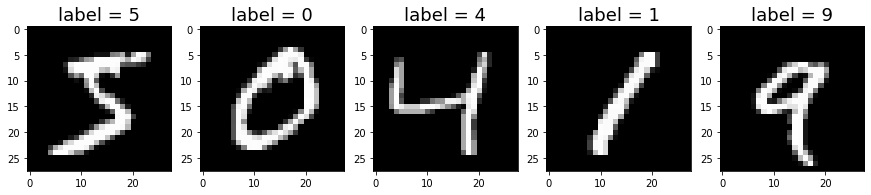

In [4]:
import matplotlib.pyplot as plt
plt.gcf().set_size_inches(15, 4) # 圖形寬高
for i in range(5):
    ax = plt.subplot(1, 5, 1+i) # 1*5 子圖表
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title('label = '+ str(train_labels[i]), fontsize=18)
plt.show()

In [5]:
x_train = train_images.reshape((train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
x_train = x_train.astype('float32')/255
x_test = test_images.reshape((test_images.shape[0], test_images.shape[1]*test_images.shape[2]))
x_test = x_test.astype('float32')/255

In [6]:
from tensorflow.keras.utils import to_categorical
# one-hot 編碼
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### 建立模型
input = $relu(input \times w1+b1)$

$$relu(dot(input(batch_siez, input_dim), w1(input_dim, units)) + b1(units))$$

output1(128, 512) = $relu(dot(input(128, 784), w1(784, 512)) + b1(512))$

output2(128, 10) = $relu(dot(input(128, 512), w1(512, 10)) + b1(10))$

### compile
- loss
    - crossentropy，可測量分布之間的距離，即預測和真實值的距離

### loss
可針對每個輸出層賦予損失函數的方法

##### 分類問題
- crossentropy
    - binary_crossentropy
        - 二元分類
        - sigmoid 激活函數
    - categorical_crossentropy
        - 適用於 one-hot 編碼標籤
        - softmax
    - spare_categorical_crossentropy
        - 輸出是整數值
        - softmax

##### 預測數值
- maen error
    - mean_squared_error
    - mean_absolute_error

### metrics
可針對每個輸出層賦予評量的方法
loss 對應正確的評量方式

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(512, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

- 與上述一樣，但宣告結構不同而已
- 也可以連續串激活函數
```python=
model = Sequential([
    Dense(512, input_dim=784),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])
```

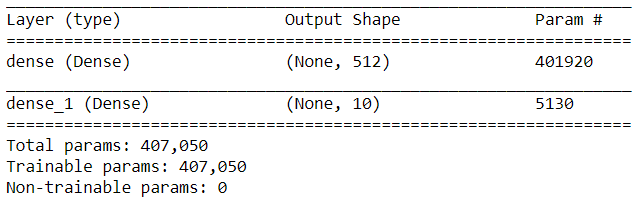

- Output Shape  
    - 第 0 軸表示樣本數量，None 表示不確定，該值為 `mini-batch`

$40912 = (784\times512)+512$
$5130 = (512\times10)+10$

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


- epochs
    - 訓練週期
    - 所有資料遍歷一遍，為一周期
- batch_size
    - 每批樣本數量
    - 每次取 128 樣本訓練
    
初始權重都是隨機的，每次執行結果都會不一樣，用錯激活函數也會影響 loss

In [13]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2585 - accuracy: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1049 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0690 - accuracy: 0.9793
Epoch 4/5
60000/60000 [==============================] - 4s 61us/sample - loss: 0.0498 - accuracy: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0371 - accuracy: 0.9888


### 模型評估

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_loss)
print(test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.06888697857037186
0.9789


### 模型預測答案

In [17]:
pre = model.predict(x_test) #  predict_classes 可直接看到答案
print(pre.round(1))

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


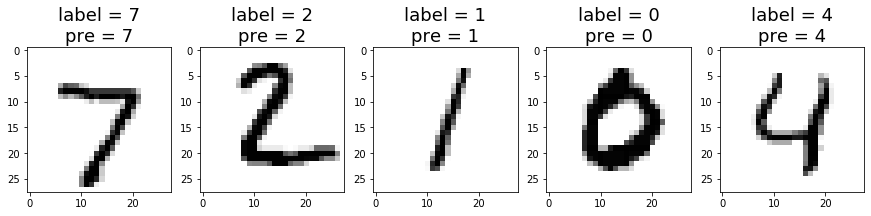

In [19]:
pre = model.predict_classes(x_test)
plt.gcf().set_size_inches(15, 4) # 圖形寬高
for i in range(5):
    ax = plt.subplot(1, 5, 1+i) # 1*5 子圖表
    ax.imshow(test_images[i], cmap='binary')
    ax.set_title('label = '+ str(test_labels[i]) + '\npre = ' + str(pre[i]), fontsize=18)
plt.show()

### 模型儲存

In [22]:
model.save('mnist/MnistMode.h5') # 儲存模型架構與參數權重
# load_model 載入模型